In [2]:
%matplotlib inline 
# permite que los graficos de matplotlib se incluyan en el notebook


In [3]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('dark')

import matplotlib.pyplot as plt
from empiricaldist import Pmf

### Constructor

In [4]:
# Crear un Pmf vacio
# representa las caras de un dado
d6 = Pmf()
d6

,probs


In [5]:
# Añadir elementos y prob al objeto Pmf
for x in [1,2,3,4,5,6]:
    d6[x] = 1

In [6]:
# las probabilidades incialmente no suman 1
d6

,probs
1,1
2,1
3,1
4,1
5,1
6,1


In [7]:
# Normalizar Pmf
# asigna una probabilidad igual para todos los elementos
# devuelve la probabilidad total antes de la normalizacion
d6.normalize()

6

In [8]:
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


### Propiedades

In [9]:
# En Pmf los indices contienen las cantidades (qs) y los valores contienen las prob (ps)
# Estos atributos estan disponibles como propiedades y se retornan como arrays
d6.qs

array([1, 2, 3, 4, 5, 6])

In [10]:
d6.ps

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

### Intercambio

In [11]:
# añadir elementos mediante un diccionario
d = dict(a=1, b=2, c=3)
pmf = Pmf(d)
pmf

,probs
a,1
b,2
c,3


In [12]:
# añadir elementos mediante listas
qs = [1,2,3,4]
ps = [0.25,0.25,0.25,0.25]
d4 = Pmf(ps, index=qs)
d4

,probs
1,0.25
2,0.25
3,0.25
4,0.25


In [13]:
# Copiar un Pmf
d6_copy = Pmf(d6)
d6_copy

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [14]:

# en el caso anterior, tanto la copia como el original comparten el mismo array
d6.index is d6_copy.index

True

In [15]:
# Copiar un Pmf totalmente independiente
d6_copy = Pmf(d6, copy=True)
d6_copy

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [16]:
# Verificamos que ambos objetos sean independientes
d6_copy.index is d6.index

False

In [17]:
# tambien puede utilizar la funcion copy para hacer una copia independiente
d4_copy = d4.copy()
d4_copy

,probs
1,0.25
2,0.25
3,0.25
4,0.25


In [18]:
# verificamos que ambos objetos sean independientes
d4_copy.index is d4.index

False

### Grafico de Pmfs

In [19]:
# Pmf provee la funcion bar, la cual grafica la Pmf como un grafico de barra

# configuracion de estilo para el grafico del dado
def decorate_dice(title):
    plt.xlabel('Outcome')
    plt.ylabel('PMF')
    plt.title(title)

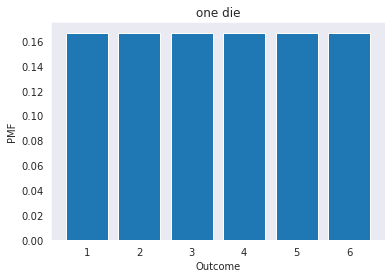

In [20]:
d6.bar()
decorate_dice('one die')

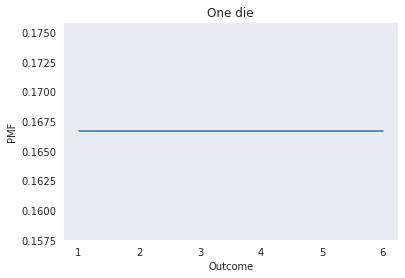

In [21]:
# Pmf hereda las graficas de tipo plot
d6.plot()
decorate_dice('One die')

### Crear un Pmf a partir de una Secuencia de Valores

In [22]:
pmf = Pmf.from_seq(list('jeinfferson'))
pmf

,probs
e,0.181818
f,0.181818
i,0.090909
j,0.090909
n,0.181818
o,0.090909
r,0.090909
s,0.090909


In [23]:
pmf = Pmf.from_seq(np.array([1,2,2,3,4,3,5,3]))
pmf

,probs
1,0.125
2,0.250
3,0.375
4,0.125
5,0.125


### Seleccion

In [24]:
# puedes seleccionar los valores de Pmf uno por uno. Devuelve 0 si el valor no se encuentra en la dist
d6[1]

0.16666666666666666

In [25]:
d6[5]

0.16666666666666666

In [26]:
# los Pmf son mutables, pero en general el resultado no se normaliza
d6[7] = 1/6
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667
7,0.166667


In [27]:
d6.sum()

1.1666666666666665

In [28]:
# Al agregar un nuevo elemento, debemos normalizar nuevamente las probabilidades
d6.normalize()

1.1666666666666665

In [29]:
d6

,probs
1,0.142857
2,0.142857
3,0.142857
4,0.142857
5,0.142857
6,0.142857
7,0.142857


### Estadistica

In [30]:
# las funciones estadisticas solo trabajan correctamente si el Pmf esta normalizado

# promedio de Pmf
d6.mean()

4.000000000000001

In [31]:
# varianza de Pmf
d6.var()

4.0

In [32]:
# desviacion estandar de Pmf
d6.std()

2.0

### Muestras

In [33]:
# choice selecciona un valores aleatorios de Pmf

# selecciona 10 valores aleatorios de d6
d6.choice(size=20)  

array([2, 6, 1, 4, 3, 5, 3, 5, 5, 2, 2, 4, 1, 5, 3, 5, 6, 7, 4, 4])

In [35]:
# sample selecciona valores aleatorios de Pmf 
d6.sample(n=10)

array([7., 3., 6., 4., 1., 7., 1., 2., 6., 2.])

### Aritmetica

In [36]:
# Pmf provee de la funcion add_dist la cual calcula la distribucion de la suma
# la implementacion utiliza productos externos para calcular la convolucion de las dos distribuciones

# distribucion de la suma de dos dados
d6 = Pmf.from_seq([1,2,3,4,5,6])
twice = d6.add_dist(d6)
twice

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


6.999999999999998

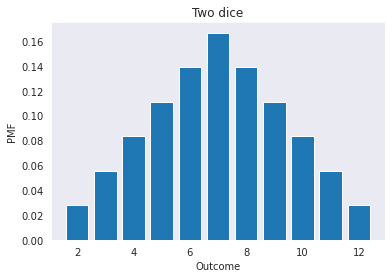

In [37]:
# Grafica de la distribucion de la suma de dos dados
twice.bar()
decorate_dice('Two dice')
twice.mean()

In [38]:
# Al añadir una constante a la distribucion podria construir una Pmf determinista
const = Pmf.from_seq([1])
d4.add_dist(const) 
# mueve los valores en una unidad, las probabilidad quedan inalterables

,probs
2,0.25
3,0.25
4,0.25
5,0.25


In [39]:
# add_dist maneja variables como una caso especial
d4.add_dist(2)
#mueven los valores dos unidades

,probs
3,0.25
4,0.25
5,0.25
6,0.25


In [41]:
# Tambien se puede implementar otras operaciones aritmeticas
# mueve las prob por debajo de los valores originales 
d6.sub_dist(d4)

,probs
-3,0.041667
-2,0.083333
-1,0.125000
0,0.166667
1,0.166667
2,0.166667
3,0.125000
4,0.083333
5,0.041667


In [42]:
# mul_dist recibe una lista como parametro y multiplica cada valor con los valores de la distribucion
# a su vez, recalcula la probabilidad para la nueva lista de valores
d4.mul_dist(d4)

,probs
1,0.0625
2,0.1250
3,0.1250
4,0.1875
6,0.1250
8,0.1250
9,0.0625
12,0.1250
16,0.0625


In [43]:
# div_dist() recibe como parametro una lista de valores y divide cada valor de la distribucion con 
#los valores de la lista y recalcula las probabilidades para la nueva lista
d4.div_dist(d4)

,probs
0.250000,0.0625
0.333333,0.0625
0.500000,0.1250
0.666667,0.0625
0.750000,0.0625
1.000000,0.2500
1.333333,0.0625
1.500000,0.0625
2.000000,0.1250
3.000000,0.0625


### Operadores de Comparacion

In [45]:
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [50]:
# Pmf implementa operadores de comparacion que retornan probabilidades de que tan parecido
# son dos distribuciones

# Compara un Pmf con un escalar. Defasada en 1. Devuelve la probabilidad acumulada
d6.lt_dist(7)

0.9999999999999999

In [51]:
# Devuelve la probabilidad acumulada de un valor. Orden inverso
d6.ge_dist(0)

0.9999999999999999

In [52]:
# Comparacion de objetos Pmf
#gt_dist() compara distribuciones asignando una probabilidad de ser las mismas. defasada 1 valor
d4.gt_dist(d6)

0.25

In [53]:
#  le_dist() compara distribuciones asignando una probabilidad de ser las mismas. En orden inverso
d6.le_dist(d4)

0.41666666666666663

In [54]:
# eq_dist() verifica que tan probables es que dos distribuciones sean equivalentes
d4.eq_dist(d6)

0.16666666666666666